https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8


https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Logistic%20Regression%20balanced.ipynb

#Building A Logistic Regression in Python, Step by Step

**Logistic Regression** is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In **logistic regression**, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the **logistic regression** model *predicts P(Y=1)* as a function of X.


##Logistic regression assumptions
-   Binary logistic regression requires the dependent variable to be binary.
-   For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
-   Only the meaningful variables should be included.
-   The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
-   The independent variables are linearly related to the log odds.
-   Logistic regression requires quite large sample sizes.


##Glosary
-   Log Odds: Odds ratio transformed by logarithm operation

In [17]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [18]:
data = pd.read_csv('./data/bank-additional-full.csv', header=0, sep=';')
data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [19]:
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [20]:
data['education'].unique()

# filteredData = data[data['pdays']!= -1]

filteredData = data.copy()

filteredData['education']=np.where(filteredData['education'] =='basic.9y', 'Basic', filteredData['education'])
filteredData['education']=np.where(filteredData['education'] =='basic.6y', 'Basic', filteredData['education'])
filteredData['education']=np.where(filteredData['education'] =='basic.4y', 'Basic', filteredData['education'])

filteredData.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married        Basic       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married        Basic       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [21]:
filteredData['y'].unique()
filteredData['education'].unique()

array(['Basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

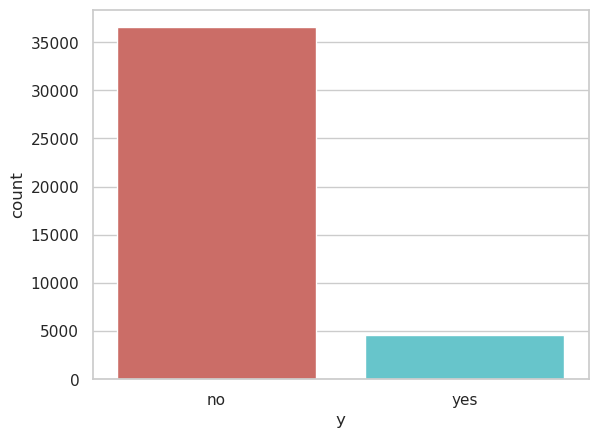

<Figure size 640x480 with 0 Axes>

In [22]:
data['y'].value_counts()
sns.countplot(x='y', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

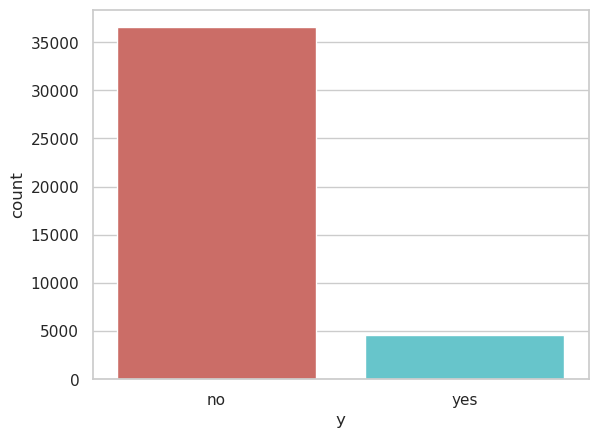

<Figure size 640x480 with 0 Axes>

In [23]:
filteredData['y'].value_counts()
sns.countplot(x='y', data=filteredData, palette='hls')
plt.show()
plt.savefig('count_plot')

In [24]:
count_no_sub = len(filteredData[filteredData['y']=='no'])
count_sub = len(filteredData[filteredData['y']=='yes'])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


In [25]:
filteredData.groupby('y').mean()

age    duration  campaign       pdays  previous  emp.var.rate  \
y                                                                          
no   39.911185  220.844807  2.633085  984.113878  0.132374      0.248875   
yes  40.913147  553.191164  2.051724  792.035560  0.492672     -1.233448   

     cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
y                                                           
no        93.603757     -40.593097   3.811491  5176.166600  
yes       93.354386     -39.789784   2.123135  5095.115991

In [26]:
filteredData.groupby('job').mean()

age    duration  campaign       pdays  previous  \
job                                                                    
admin.         38.187296  254.312128  2.623489  954.319229  0.189023   
blue-collar    39.555760  264.542360  2.558461  985.160363  0.122542   
entrepreneur   41.723214  263.267857  2.535714  981.267170  0.138736   
housemaid      45.500000  250.454717  2.639623  960.579245  0.137736   
management     42.362859  257.058140  2.476060  962.647059  0.185021   
retired        62.027326  273.712209  2.476744  897.936047  0.327326   
self-employed  39.949331  264.142153  2.660802  976.621393  0.143561   
services       37.926430  258.398085  2.587805  979.974049  0.154951   
student        25.894857  283.683429  2.104000  840.217143  0.524571   
technician     38.507638  250.232241  2.577339  964.408127  0.153789   
unemployed     39.733728  249.451677  2.564103  935.316568  0.199211   
unknown        45.563636  239.675758  2.648485  938.727273  0.154545   

               emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
job                                                                     
admin.             0.015563       93.534054     -40.245433   3.550274   
blue-collar        0.248995       93.656656     -41.375816   3.771996   
entrepreneur       0.158723       93.605372     -41.283654   3.791120   
housemaid          0.433396       93.676576     -39.495283   4.009645   
management        -0.012688       93.522755     -40.489466   3.611316   
retired           -0.698314       93.430786     -38.573081   2.770066   
self-employed      0.094159       93.559982     -40.488107   3.689376   
services           0.175359       93.634659     -41.290048   3.699187   
student           -1.408000       93.331613     -40.187543   1.884224   
technician         0.274566       93.561471     -39.927569   3.820401   
unemployed        -0.111736       93.563781     -40.007594   3.466583   
unknown            0.357879       93.718942     -38.797879   3.949033   

               nr.employed  
job                         
admin.         5164.125350  
blue-collar    5175.615150  
entrepreneur   5176.313530  
housemaid      5179.529623  
management     5166.650513  
retired        5122.262151  
self-employed  5170.674384  
services       5171.600126  
student        5085.939086  
technician     5175.648391  
unemployed     5157.156509  
unknown        5172.931818

In [27]:
filteredData.groupby('marital').mean()

age    duration  campaign       pdays  previous  emp.var.rate  \
marital                                                                         
divorced  44.899393  253.790330   2.61340  968.639853  0.168690      0.163985   
married   42.307165  257.438623   2.57281  967.247673  0.155608      0.183625   
single    33.158714  261.524378   2.53380  949.909578  0.211359     -0.167989   
unknown   40.275000  312.725000   3.18750  937.100000  0.275000     -0.221250   

          cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
marital                                                          
divorced       93.606563     -40.707069   3.715603  5170.878643  
married        93.597367     -40.270659   3.745832  5171.848772  
single         93.517300     -40.918698   3.317447  5155.199265  
unknown        93.471250     -40.820000   3.313038  5157.393750

In [28]:
filteredData.groupby('education').mean()

age    duration  campaign       pdays  previous  \
education                                                                    
Basic                42.163910  263.043874  2.559498  974.877967  0.141053   
high.school          37.998213  260.886810  2.568576  964.358382  0.185917   
illiterate           48.500000  276.777778  2.277778  943.833333  0.111111   
professional.course  40.080107  252.533855  2.586115  960.765974  0.163075   
university.degree    38.879191  253.223373  2.563527  951.807692  0.192390   
unknown              43.481225  262.390526  2.596187  942.830734  0.226459   

                     emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
education                                                                     
Basic                    0.191329       93.639933     -40.927595   3.729654   
high.school              0.032937       93.584857     -40.940641   3.556157   
illiterate              -0.133333       93.317333     -39.950000   3.516556   
professional.course      0.173012       93.569864     -40.124108   3.710457   
university.degree       -0.028090       93.493466     -39.975805   3.529663   
unknown                  0.059099       93.658615     -39.877816   3.571098   

                     nr.employed  
education                         
Basic                5172.014113  
high.school          5164.994735  
illiterate           5171.777778  
professional.course  5170.155979  
university.degree    5163.226298  
unknown              5159.549509

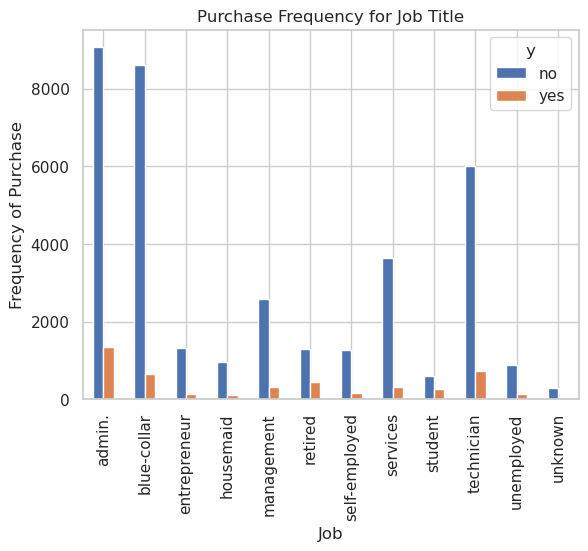

In [29]:
%matplotlib inline
pd.crosstab(filteredData.job,filteredData.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

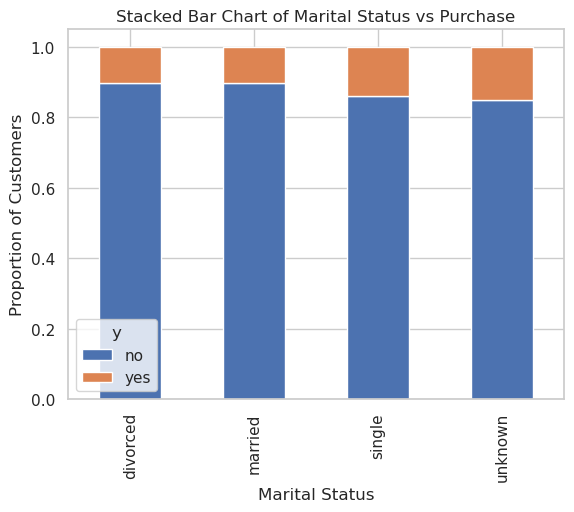

In [30]:
table=pd.crosstab(filteredData.marital,filteredData.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

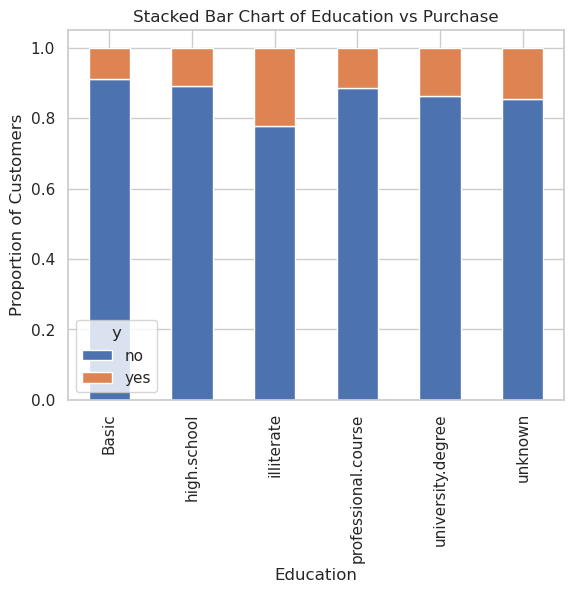

In [31]:
table=pd.crosstab(filteredData.education,filteredData.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

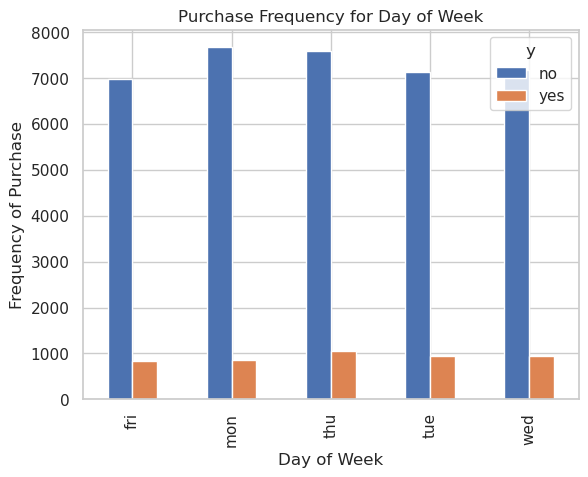

In [32]:
pd.crosstab(filteredData.day_of_week,filteredData.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

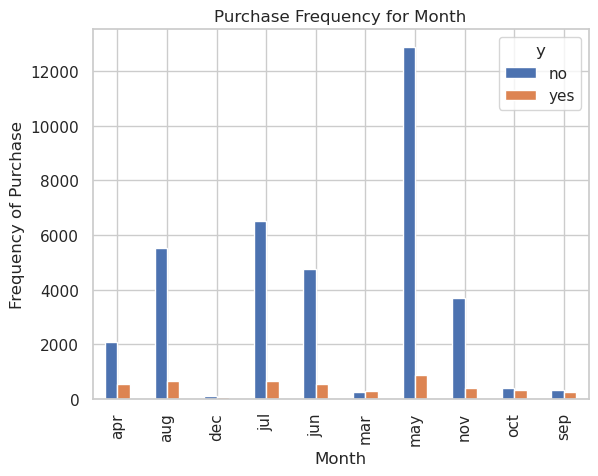

In [33]:
pd.crosstab(filteredData.month,filteredData.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

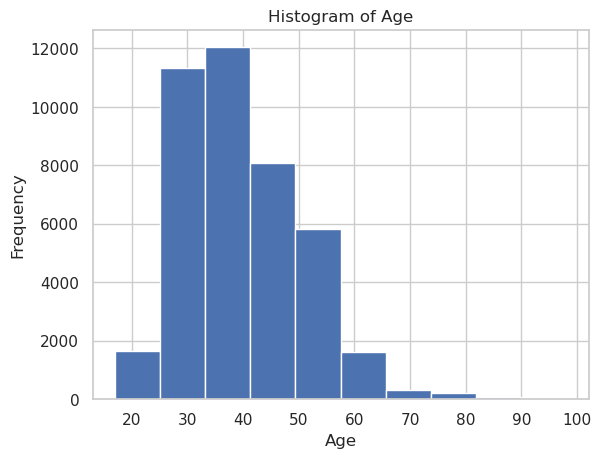

In [34]:
filteredData.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

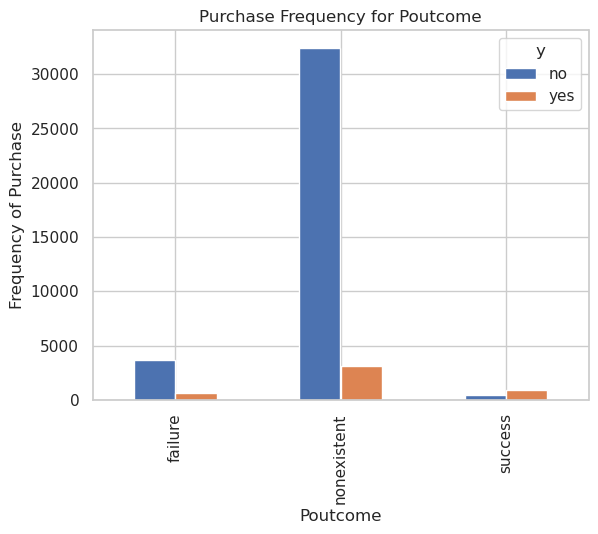

In [35]:
pd.crosstab(filteredData.poutcome,filteredData.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

The code below creates new dummy variables.
what is and what does a dummy variable?

In [36]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(filteredData[var], prefix=var)
    filteredData1=filteredData.join(cat_list)
    filteredData=filteredData1
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
filteredData_vars=filteredData.columns.values.tolist()
to_keep=[i for i in filteredData_vars if i not in cat_vars]

In [37]:
data_final=filteredData[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [38]:
data_final.head()

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ... month_oct  month_sep  \
0          -36.4      4.857       5191.0  ...         0          0   
1          -36.4      4.857       5191.0  ...         0          0   
2          -36.4      4.857       5191.0  ...         0          0   
3          -36.4      4.857       5191.0  ...         0          0   
4          -36.4      4.857       5191.0  ...         0          0   

   day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0                0                1                0                0   
1                0                1                0                0   
2                0                1                0                0   
3                0                1                0                0   
4                0                1                0                0   

   day_of_week_wed  poutcome_failure  poutcome_nonexistent  poutcome_success  
0                0                 0                     1                 0  
1                0                 0                     1                 0  
2                0                 0                     1                 0  
3                0                 0                     1                 0  
4                0                 0                     1                 0  

[5 rows x 62 columns]

Over-sampling using SMOTE
With our training data created, I’ll up-sample the no-subscription using the SMOTE algorithm(Synthetic Minority Oversampling Technique). At a high level, SMOTE:

Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.
We are going to implement SMOTE in Python.

In [39]:
from imblearn.over_sampling import SMOTE

X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
y['y'] = y['y'].replace(['no', 'yes'], [0, 1])

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

/tmp/ipykernel_8589/3943028550.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['y'] = y['y'].replace(['no', 'yes'], [0, 1])


In [40]:
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']=='no']))
print("Number of subscription",len(os_data_y[os_data_y['y']=='yes']))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']=='no'])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']=='yes'])/len(os_data_X))

length of oversampled data is  51158
Number of no subscription in oversampled data 0
Number of subscription 0
Proportion of no subscription data in oversampled data is  0.0
Proportion of subscription data in oversampled data is  0.0


In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())

/home/armsjs/anaconda3/envs/DataSciencePortfolio/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/armsjs/anaconda3/envs/DataSciencePortfolio/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

In [42]:
cols = [os_data_X.columns[i] for i in range(len(os_data_X.columns)) if(rfe.support_[i])]

# cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 
#       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
#       'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']


In [43]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.364556
         Iterations 8
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.474     
Dependent Variable:      y                    AIC:                  37337.9450
Date:                    2022-11-22 21:01     BIC:                  37505.9558
No. Observations:        51158                Log-Likelihood:       -18650.   
Df Model:                18                   LL-Null:              -35460.   
Df Residuals:            51139                LLR p-value:          0.0000    
Converged:               1.0000               Scale:                1.0000    
No. Iterations:          8.0000                                               
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------

In [44]:
cols = [value for value in cols if value not in ['marital_married', 'housing_unknown', 'housing_yes', 'loan_unknown']]

X=os_data_X[cols]
y=os_data_y['y']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.367269
         Iterations 8
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.470     
Dependent Variable:      y                    AIC:                  37609.5401
Date:                    2022-11-22 21:01     BIC:                  37751.0229
No. Observations:        51158                Log-Likelihood:       -18789.   
Df Model:                15                   LL-Null:              -35460.   
Df Residuals:            51142                LLR p-value:          0.0000    
Converged:               1.0000               Scale:                1.0000    
No. Iterations:          8.0000                                               
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------

In [45]:
cols = [value for value in cols if value not in ['housing_no']]

X=os_data_X[cols]
y=os_data_y['y']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.368451
         Iterations 8
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.468     
Dependent Variable:      y                    AIC:                  37728.3860
Date:                    2022-11-22 21:01     BIC:                  37861.0261
No. Observations:        51158                Log-Likelihood:       -18849.   
Df Model:                14                   LL-Null:              -35460.   
Df Residuals:            51143                LLR p-value:          0.0000    
Converged:               1.0000               Scale:                1.0000    
No. Iterations:          8.0000                                               
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [47]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7614   37]
 [1296 6401]]


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      7651
           1       0.99      0.83      0.91      7697

    accuracy                           0.91     15348
   macro avg       0.92      0.91      0.91     15348
weighted avg       0.92      0.91      0.91     15348



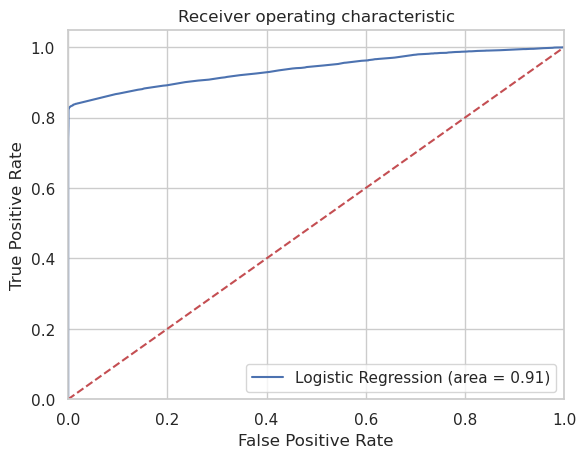

In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()